### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Churn Prediction <p/> 

<p style= "color:rgb(148,16,16);font-weight:bold;font-size:25px" >Context<p/>
<p style="color:rgb(148,16,16);font-size:15px;padding:10px 10px;font-weight:bold">
    Predict behavior to retain customers. You can analyze all relevant customer data and develop focused 
    customer retention programs.[IBM Sample Data Sets] <p/>


<p style= "color:rgb(64,123,162);font-weight:bold;font-size:25px" >Content<p/>
<p style="color:rgb(64,123,162);font-size:15px;padding:10px 10px;font-weight:bold">
    Each row represents a customer, each column contains customer’s attributes described on the column Metadata <p/>

<p style= "color:rgb(117,35,99);font-weight:bold;font-size:25px" >The data set includes information about:<p/>

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup,   device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing,      monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
# General Libraries for dataframes, math, and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 


# Notebook options
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn-dark')


import warnings
warnings.filterwarnings('ignore')

#!pip install nb_black -q
#%load_ext lab_black

In [2]:
# Read in the data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check Dtypes and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Feature Exploration <p/> 

* Replace empty string with 0 in the 'TotalCharges' column, and change to float64
* Categorical Features with extra 'No internet service' group will be replace with just 'No'
* Barplot of the Churn counts for each categorical feature
* Pairplot for numerical features

In [4]:
# Replace empty string with 0 in the 'TotalCharges' column, and change to float64

df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [5]:
# Categorical Features with extra 'No internet service' group will be replace with just 'No'

df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [6]:
# List of categorical features

cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

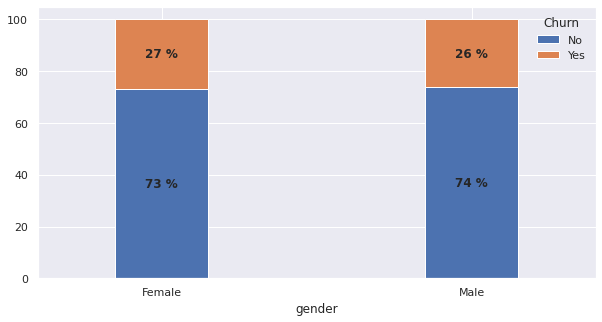

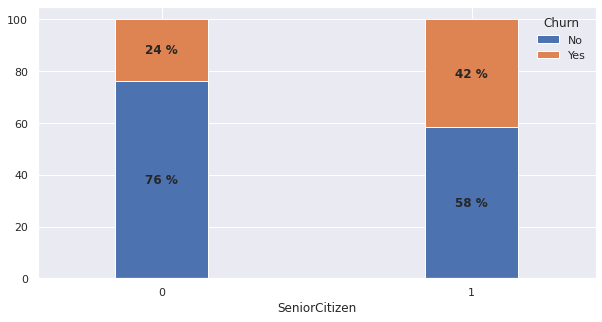

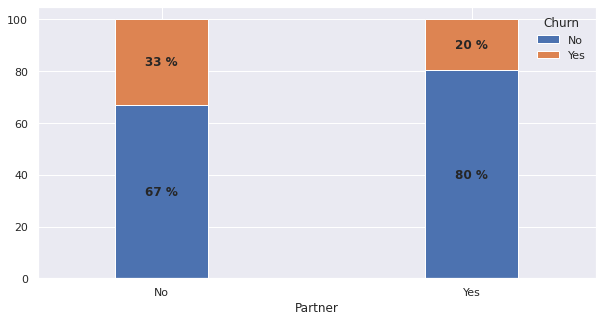

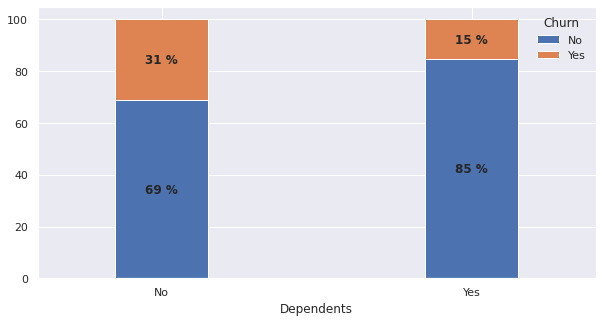

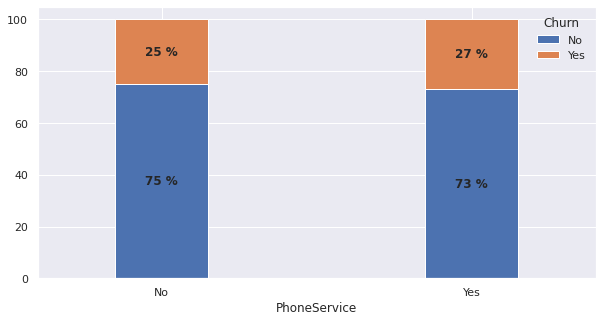

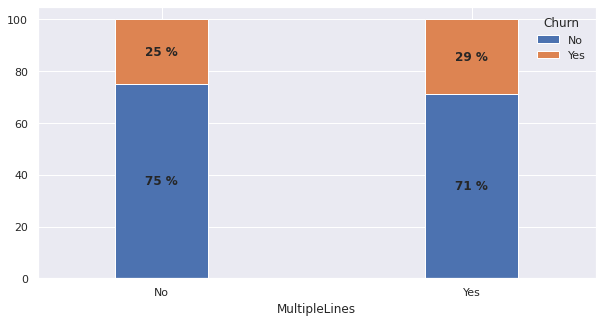

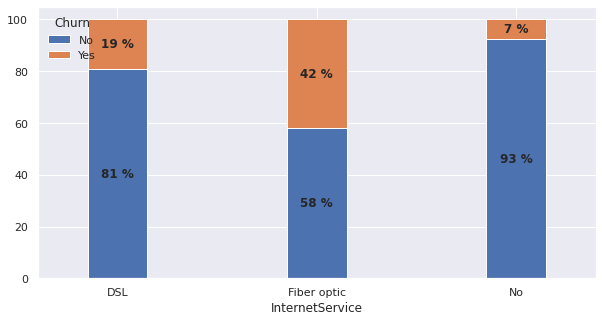

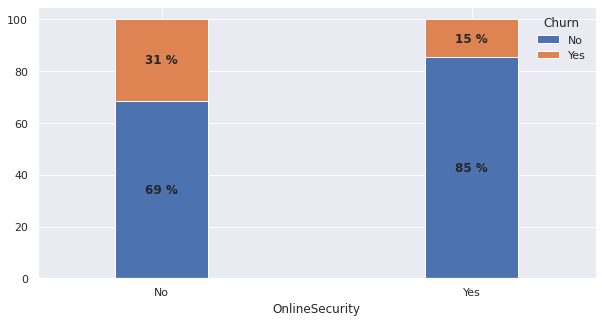

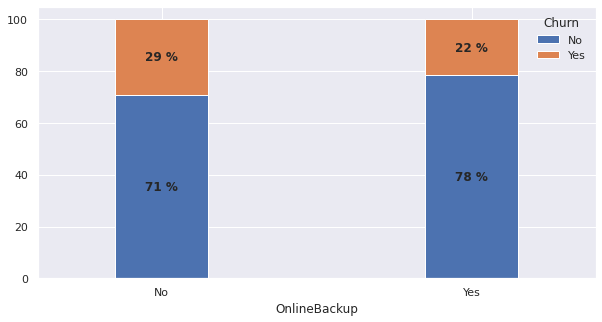

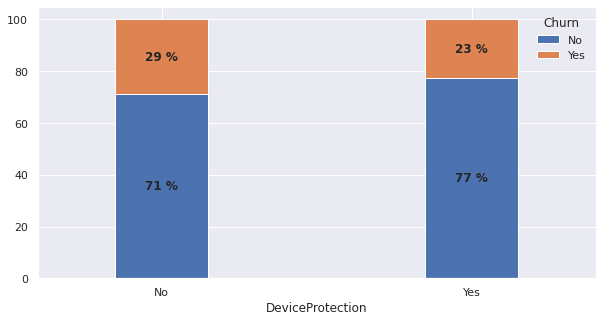

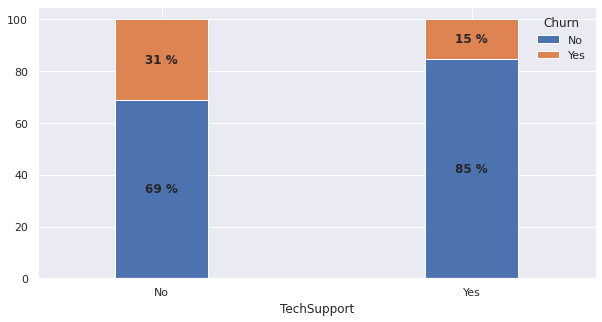

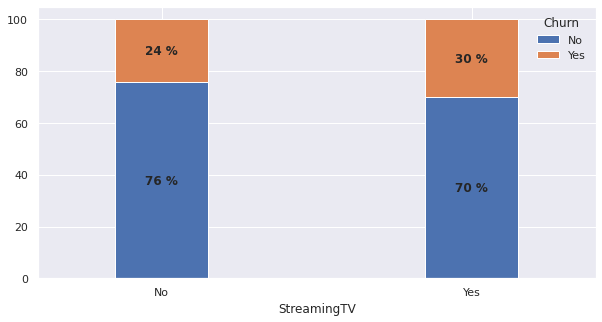

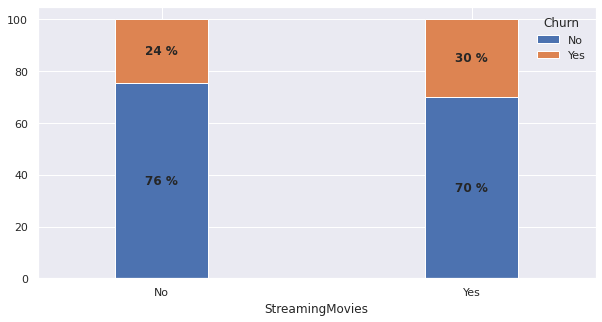

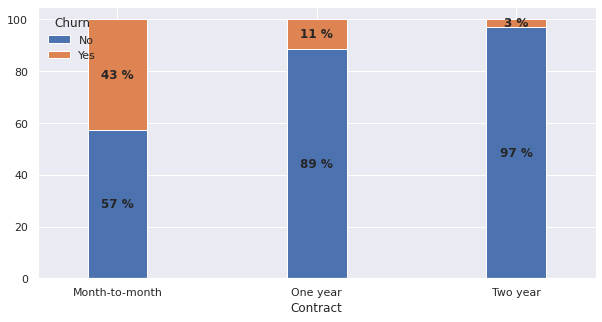

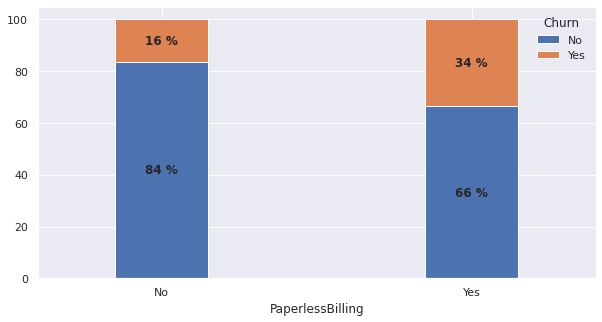

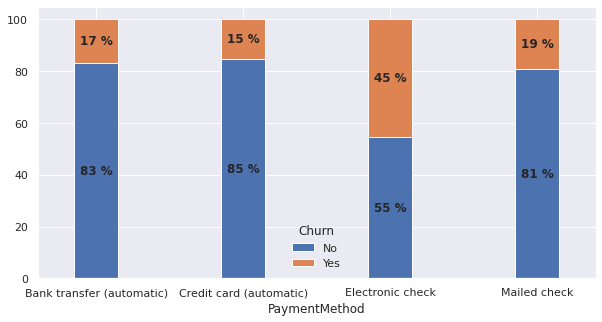

In [7]:
#Barplot of the Churn counts for each categorical feature

sns.set(font_scale=1)

for i in range(len(cat_features)):
    
    counts = df.groupby([cat_features[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (10,5))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',
                weight='bold')

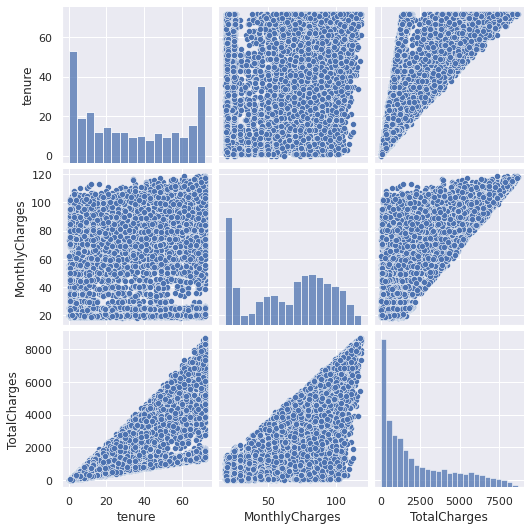

In [8]:
# Pairplot for numerical features

numerical_features = ['tenure','MonthlyCharges','TotalCharges']

sns.pairplot(df[numerical_features])

### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Preparing Data For Machine Learning Models <p/>

* Create dummy variables for categorical features
* Recode our target variable
* Assign our features to X and target to y
* Split data into training and test sets

In [9]:
# Create dummy variables for categorical features
# Recode our target variable

dummies_df = pd.get_dummies(df, columns=cat_features, prefix=cat_features, drop_first=True)
dummies_df['Churn'] = dummies_df['Churn'].replace({'Yes': 1, 'No':0})

In [10]:
# Assign our features to X and target to y

X = dummies_df.drop(['customerID','Churn'], axis=1)
y = dummies_df['Churn']

In [11]:
# Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Model Pipeline for First Attempt <p/>

* Create a pipeline of several ML models at default settings to get a baseline
* Look at the train/test accuracy & AUC scores
* Check the performance of each model and decide on which model(s) to fine tune

In [12]:
# Create a pipeline of classification models to get an idea of which will have the highest predictive accuracy

model_pipeline = []
model_pipeline.append(LogisticRegression(random_state=42))
model_pipeline.append(SVC(random_state=42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier(random_state=42))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(GaussianNB())
model_pipeline.append(xgb.XGBClassifier(random_state=42))

In [13]:
# Create a for-loop to check the accuracy for each model

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'XGB']
train_acc_list = []
test_acc_list = []
train_auc_list = []
test_auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
   
    
    train_acc_list.append(accuracy_score(y_train,y_pred_train))
    test_acc_list.append(accuracy_score(y_test,y_pred_test))
    
    fpr1, tpr1, _thresholds = metrics.roc_curve(y_train, y_pred_train)
    train_auc_list.append(round(metrics.auc(fpr1,tpr1),2))
    
    fpr2, tpr2, _thresholds = metrics.roc_curve(y_test, y_pred_test)
    test_auc_list.append(round(metrics.auc(fpr2,tpr2),2))
    
    cm_list.append(confusion_matrix(y_test,y_pred_test))

In [14]:
#Create a dataframe to view the accuracy for each model in an organized fashion
result_df = pd.DataFrame({'Model':model_list,
                          'Train Accuracy': train_acc_list,
                         'Test Accuracy':test_acc_list,
                         'Train AUC':train_auc_list,
                         'Test AUC':test_auc_list})
result_df

,Model,Train Accuracy,Test Accuracy,Train AUC,Test AUC
0,Logistic Regression,0.805289,0.801278,0.72,0.72
1,SVM,0.734647,0.734564,0.50,0.50
2,KNN,0.828186,0.765082,0.74,0.66
3,Decision Tree,0.998048,0.735273,1.00,0.65
4,Random Forest,0.998048,0.794890,1.00,0.70
5,Naive Bayes,0.752041,0.743790,0.76,0.75
6,XGB,0.934860,0.783534,0.90,0.69


## 1st Attempt Results:

1. Logistic Regression is performing the best (High accuracy and not overfitting)
2. Naive Bayes is performing 2nd best
3. KNN is performing pretty well but is slighlty overfitting
4. SVM has high accuracy but low AUC score 
5. DT, RF, and XGB are overfitting

Notes:
* AUC will be more important in this project since we have class impalance in our target variable
* We should try cross-validation to remedy the overfitting
* We should use a GridSearchCV or RandomizedSearchCV to tune the hyperparameters of our models

### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Logistic Regression <p/>

## Using GridSearchCV for hyperparameters tuning

### In our first attempt of the LogisticRegression class, we created an instance of the LogisticRegression class without passing it any initializers. Instead, we rely on the default values of the various hyperparameters, such as:

* penalty — Specify the norm of the penalty.
* C — Inverse of regularization strength; smaller values specify stronger regularization.
* solver — Algorithm to use in the optimization problem.
* max_iter — Maximum number of iterations taken for the solvers to converge.

In [15]:
# Create hyperparamter grid

parameters = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["newton-cg", "lbfgs", "liblinear"]}

logreg = LogisticRegression(random_state=42)
clf = GridSearchCV(logreg, param_grid=parameters, scoring="accuracy", cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [16]:
# Print out the best hyperparamters and best accuracy score

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.8058148470075457


## Results:
### It doesn't look like the model improved by that much. Let's try to reduce the number of features we have.

In [17]:
# Sequential Forward Selection(sfs) 
#sfs = SFS(LogisticRegression(random_state=42, C=1000, penalty='l2', solver='newton-cg'),
          #k_features='best', 
          #forward=True, 
          #floating=False, 
          #scoring = 'precision', 
          #cv = 5)

#sfs.fit(X_train, y_train) 
#sfs.k_feature_names_

In [18]:
# Create a list of the best features according to the SFS
best_features = ['tenure',
 'TotalCharges',
 'gender_Male',
 'SeniorCitizen_1',
 'PhoneService_Yes',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'DeviceProtection_Yes',
 'StreamingMovies_Yes',
 'Contract_One year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check']

In [19]:
# Run the logistic Regression model with tuned hyperparamters and only using the best features

logreg = LogisticRegression(random_state=42, C=1000, penalty='l2', solver='newton-cg')

logreg.fit(X_train[best_features], y_train)
    
y_pred_train = logreg.predict(X_train[best_features])
y_pred_test = logreg.predict(X_test[best_features])
   
    
print('Train Score: ',  accuracy_score(y_train,y_pred_train))
print('Test Score: ', accuracy_score(y_test,y_pred_test))
    
fpr1, tpr1, _thresholds = metrics.roc_curve(y_train, y_pred_train)
print('Train AUC: ',round(metrics.auc(fpr1,tpr1),2))
    
fpr2, tpr2, _thresholds = metrics.roc_curve(y_test, y_pred_test)
print('Test AUC: ',round(metrics.auc(fpr2,tpr2),2))

Train Score:  0.8077742279020235
Test Score:  0.8019872249822569
Train AUC:  0.72
Test AUC:  0.71


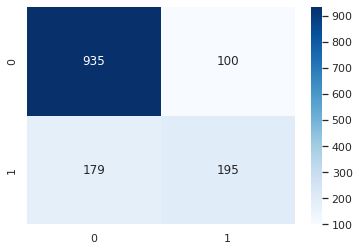

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='Blues')
plt.show()

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



## Results:

### There is not a significant change from the baseline

### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Random Forest <p/>

### Let's see if we can get better results with a random forest. 

In [22]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier(random_state=42)

clf = RandomizedSearchCV(rf,
                         param_distributions=random_grid,
                         scoring="accuracy",
                         cv=3,
                         n_iter = 100,
                         random_state=42)

#clf.fit(X_train, y_train)

In [23]:
#print("Tuned Hyperparameters :", clf.best_params_)
#print("Accuracy :", clf.best_score_)

In [24]:
rf = RandomForestClassifier(random_state=42,
                            n_estimators=1000,
                            min_samples_split=10,
                            min_samples_leaf=2,
                            max_features='sqrt',
                            max_depth = 10,
                            bootstrap=True)

rf.fit(X_train[best_features], y_train)
    
y_pred_train = rf.predict(X_train[best_features])
y_pred_test = rf.predict(X_test[best_features])
   
    
print('Train Score: ',  accuracy_score(y_train,y_pred_train))
print('Test Score: ', accuracy_score(y_test,y_pred_test))
    
fpr1, tpr1, _thresholds = metrics.roc_curve(y_train, y_pred_train)
print('Train AUC: ',round(metrics.auc(fpr1,tpr1),2))
    
fpr2, tpr2, _thresholds = metrics.roc_curve(y_test, y_pred_test)
print('Test AUC: ',round(metrics.auc(fpr2,tpr2),2))

Train Score:  0.8427405040823571
Test Score:  0.8076650106458482
Train AUC:  0.76
Test AUC:  0.7


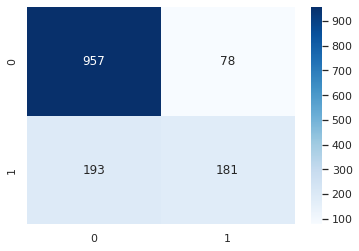

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='g', cmap='Blues')
plt.show()

In [26]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1035
           1       0.70      0.48      0.57       374

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



### <p style="background-color:rgb(106,90,205);color:rgb(255,255,255);text-align:center;font-size:40px;padding:10px 10px;font-weight:bold">Results <p/>

* Both models have an overall accuracy of approximately 80-81%
* Both models have better precision for predicting customers who don't churn (83-84% accuracte)
* The random forest does a little better than the logistic regression at predicting customers who DO churn (70% compared to 66%)
* We could work on tuning these models more, as well as the other baseline models, but these results are okay for now

